In [9]:
from env import get_db_url
import numpy as np
import pandas as pd
import os
import acquire
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

In [10]:
def wrangle_zillow():
    zillow = acquire.get_zillow_data()
    zillow = zillow.dropna()
    zillow = zillow.rename(columns = {'bedroomcnt': 'bedrooms',
                                 'bathroomcnt': 'bathrooms',
                                 'calculatedfinishedsquarefeet': 'sqft',
                                 'taxvaluedollarcnt': 'tax_value',
                                 'yearbuilt': 'year_built',
                                 'taxamount': 'tax_amount'})
    zillow.drop_duplicates(inplace=True)
    return zillow
zillow = wrangle_zillow()

Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution

In [11]:
zillow

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0


In [12]:
# def split_data_label(df, stratify_col=None, target_col=None, test_size=.2, validate_size=.2):
    
#     if stratify_col != None:
#         train_validate, test = train_test_split(df, test_size = .2, random_state=823, stratify=df[stratify_col])
#         train, validate = train_test_split(train_validate, test_size= validate_size / (1 - test_size), random_state=823, stratify=train_validate[stratify_col])
    
#         X_train = train.drop(columns=[stratify_col])
#         y_train = train[stratify_col]

#         X_validate = validate.drop(columns=[stratify_col])
#         y_validate = validate[stratify_col]

#         X_test = test.drop(columns=[stratify_col])
#         y_test = test[stratify_col]
        
#         return X_train, y_train, X_validate, y_validate, X_test, y_test

#     else:
#         train_validate, test = train_test_split(df, test_size = .2, random_state=823)
#         train, validate = train_test_split(train_validate, test_size= validate_size / (1 - test_size), random_state=823)
    
#         X_train = train.drop(columns=[target_col])
#         y_train = train[target_col]

#         X_validate = validate.drop(columns=[target_col])
#         y_validate = validate[target_col]

#         X_test = test.drop(columns=[target_col])
#         y_test = test[target_col]

#         return X_train, y_train, X_validate, y_validate, X_test, y_test

In [13]:
# X_train, y_train, X_validate, y_validate, X_test, y_test = split_data_label(zillow, target_col='tax_value')

In [14]:
X_train

NameError: name 'X_train' is not defined

In [15]:
train_validate, test = train_test_split(zillow, test_size = .2, random_state=823)
train, validate = train_test_split(train_validate, test_size= .25, random_state=823)
train.shape, validate.shape, test.shape

((1278128, 7), (426043, 7), (426043, 7))

Text(0.5, 1.0, 'Scaled')

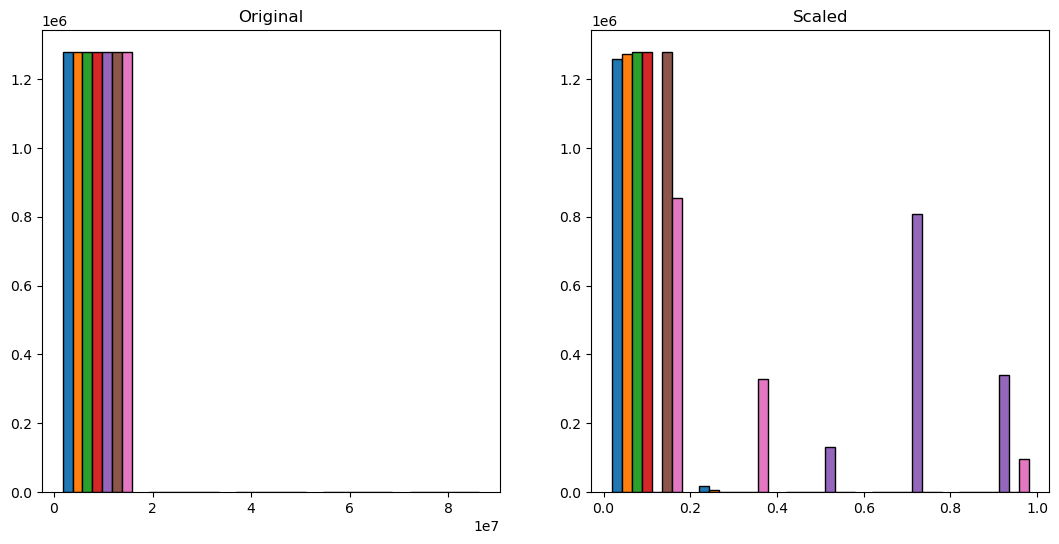

In [56]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)


plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=5, ec='black')
plt.title('Scaled')

In [17]:
train

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
1844941,3.0,2.0,1520.0,420429.0,1921.0,5174.91,6037.0
824995,5.0,3.0,2935.0,391054.0,1954.0,3399.33,6037.0
1214129,4.0,4.0,3394.0,1199447.0,1958.0,13254.74,6059.0
1566096,2.0,2.0,1048.0,187230.0,1925.0,3364.40,6037.0
1259406,4.0,3.0,2843.0,193625.0,2005.0,3340.72,6037.0
...,...,...,...,...,...,...,...
2036394,3.0,3.0,2162.0,230635.0,1958.0,2928.20,6037.0
551645,5.0,3.0,3054.0,324446.0,1996.0,4652.65,6037.0
1883454,4.0,2.5,2688.0,979673.0,2000.0,10920.26,6059.0
1292898,5.0,3.0,4354.0,663628.0,1997.0,7292.88,6111.0


In [18]:
pd.DataFrame(train_scaled)

,0,1,2,3,4,5,6
0,0.12,0.062500,0.001595,0.004776,0.558140,0.004913,0.000000
1,0.20,0.093750,0.003080,0.004443,0.711628,0.003225,0.000000
2,0.16,0.125000,0.003562,0.013627,0.730233,0.012593,0.297297
3,0.08,0.062500,0.001099,0.002127,0.576744,0.003192,0.000000
4,0.16,0.093750,0.002983,0.002200,0.948837,0.003169,0.000000
...,...,...,...,...,...,...,...
1278123,0.12,0.093750,0.002269,0.002620,0.730233,0.002777,0.000000
1278124,0.20,0.093750,0.003205,0.003686,0.906977,0.004416,0.000000
1278125,0.16,0.078125,0.002821,0.011130,0.925581,0.010374,0.297297
1278126,0.20,0.093750,0.004570,0.007539,0.911628,0.006926,1.000000


In [19]:
train_scaled

array([[0.12      , 0.0625    , 0.00159463, ..., 0.55813953, 0.00491279,
        0.        ],
       [0.2       , 0.09375   , 0.00308007, ..., 0.71162791, 0.00322508,
        0.        ],
       [0.16      , 0.125     , 0.00356192, ..., 0.73023256, 0.01259277,
        0.2972973 ],
       ...,
       [0.16      , 0.078125  , 0.00282078, ..., 0.9255814 , 0.01037382,
        0.2972973 ],
       [0.2       , 0.09375   , 0.00456972, ..., 0.91162791, 0.00692595,
        1.        ],
       [0.16      , 0.0625    , 0.00188752, ..., 0.74883721, 0.00395522,
        0.        ]])

In [20]:
train.columns

Index(['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built',
       'tax_amount', 'fips'],
      dtype='object')

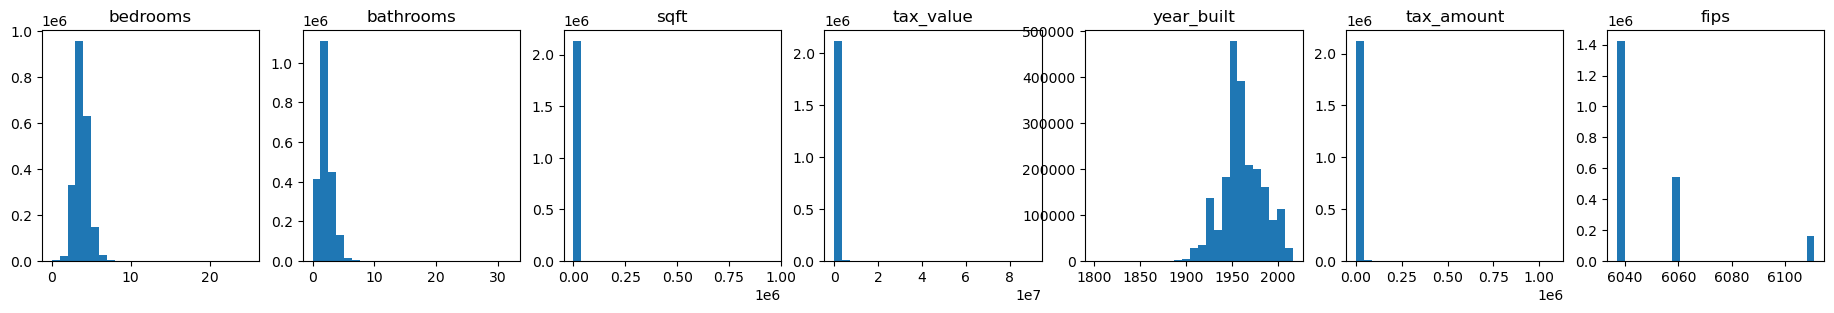

In [21]:
plt.figure(figsize=(23, 3))

# # List of columns
# cols = train.columns
#changed it up a little

for i, col in enumerate(train.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,7, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow[col].hist(bins=25)

    # Hide gridlines.
    plt.grid(False)

In [22]:
columns = train.columns #List of Columns
numbers = [0,1,2,3,4,5,6] #List of numbers for the scaled np array I'm converting into a dataframe
zipped= dict(zip(numbers, columns))
train_scaled = pd.DataFrame(train_scaled).rename(columns=zipped)

In [23]:
train_scaled

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,0.12,0.062500,0.001595,0.004776,0.558140,0.004913,0.000000
1,0.20,0.093750,0.003080,0.004443,0.711628,0.003225,0.000000
2,0.16,0.125000,0.003562,0.013627,0.730233,0.012593,0.297297
3,0.08,0.062500,0.001099,0.002127,0.576744,0.003192,0.000000
4,0.16,0.093750,0.002983,0.002200,0.948837,0.003169,0.000000
...,...,...,...,...,...,...,...
1278123,0.12,0.093750,0.002269,0.002620,0.730233,0.002777,0.000000
1278124,0.20,0.093750,0.003205,0.003686,0.906977,0.004416,0.000000
1278125,0.16,0.078125,0.002821,0.011130,0.925581,0.010374,0.297297
1278126,0.20,0.093750,0.004570,0.007539,0.911628,0.006926,1.000000


In [24]:
zipped

{0: 'bedrooms',
 1: 'bathrooms',
 2: 'sqft',
 3: 'tax_value',
 4: 'year_built',
 5: 'tax_amount',
 6: 'fips'}

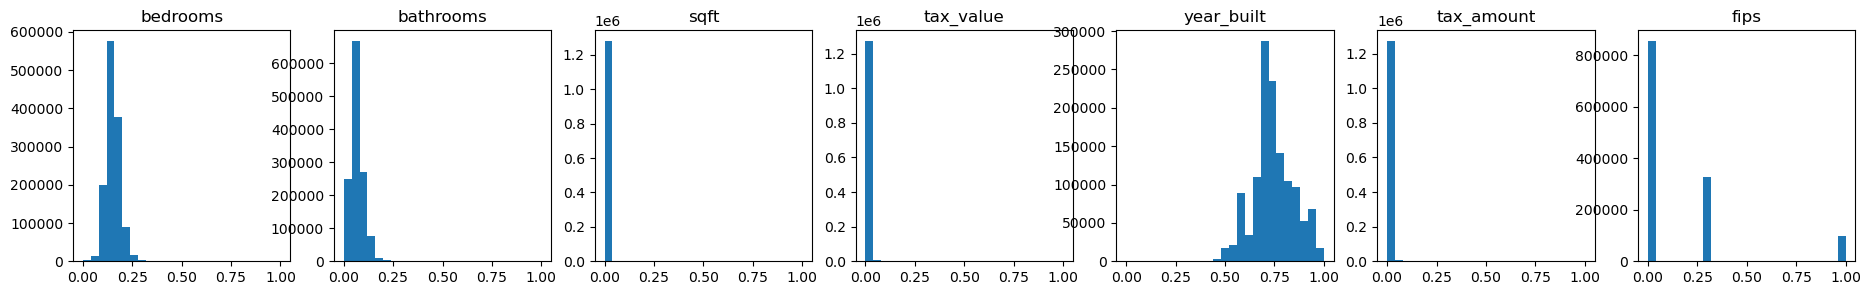

In [25]:
plt.figure(figsize=(23, 3))

# # List of columns
# cols = train.columns
#changed it up a little

for i, col in enumerate(train_scaled.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,7, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    train_scaled[col].hist(bins=25)

    # Hide gridlines.
    plt.grid(False)

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [39]:
train_scaled_inverse = scaler.inverse_transform(train_scaled)
train_scaled_inverse = pd.DataFrame(train_scaled_inverse).rename(columns=zipped)
train_scaled_inverse

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,3.0,2.0,1520.0,420429.0,1921.0,5174.91,6037.0
1,5.0,3.0,2935.0,391054.0,1954.0,3399.33,6037.0
2,4.0,4.0,3394.0,1199447.0,1958.0,13254.74,6059.0
3,2.0,2.0,1048.0,187230.0,1925.0,3364.40,6037.0
4,4.0,3.0,2843.0,193625.0,2005.0,3340.72,6037.0
...,...,...,...,...,...,...,...
1278123,3.0,3.0,2162.0,230635.0,1958.0,2928.20,6037.0
1278124,5.0,3.0,3054.0,324446.0,1996.0,4652.65,6037.0
1278125,4.0,2.5,2688.0,979673.0,2000.0,10920.26,6059.0
1278126,5.0,3.0,4354.0,663628.0,1997.0,7292.88,6111.0


In [41]:
train = train.reset_index(drop=True)
# train == train_scaled_inverse

In [42]:
train == train_scaled_inverse

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,True,True,True,True,True,True,True
1,True,True,True,True,False,True,True
2,True,True,True,True,False,True,True
3,True,True,True,False,True,True,True
4,True,True,True,True,False,True,True
...,...,...,...,...,...,...,...
1278123,True,True,True,True,False,True,True
1278124,True,True,True,True,True,True,True
1278125,True,True,True,True,False,True,True
1278126,True,True,True,True,True,True,True


Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [50]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)


In [51]:

columns = train.columns #List of Columns
numbers = [0,1,2,3,4,5,6] #List of numbers for the scaled np array I'm converting into a dataframe
zipped= dict(zip(numbers, columns))
train_scaled = pd.DataFrame(train_scaled).rename(columns=zipped)

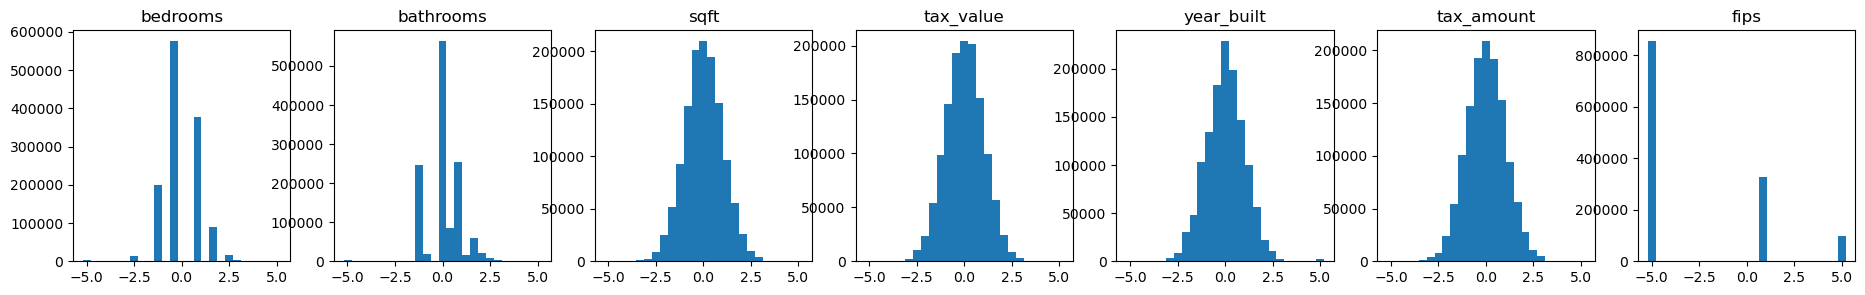

In [52]:
plt.figure(figsize=(23, 3))

for i, col in enumerate(train_scaled.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,7, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    train_scaled[col].hist(bins=25)

    # Hide gridlines.
    plt.grid(False)

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [53]:
scaler = sklearn.preprocessing.QuantileTransformer()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [54]:

columns = train.columns #List of Columns
numbers = [0,1,2,3,4,5,6] #List of numbers for the scaled np array I'm converting into a dataframe
zipped= dict(zip(numbers, columns))
train_scaled = pd.DataFrame(train_scaled).rename(columns=zipped)

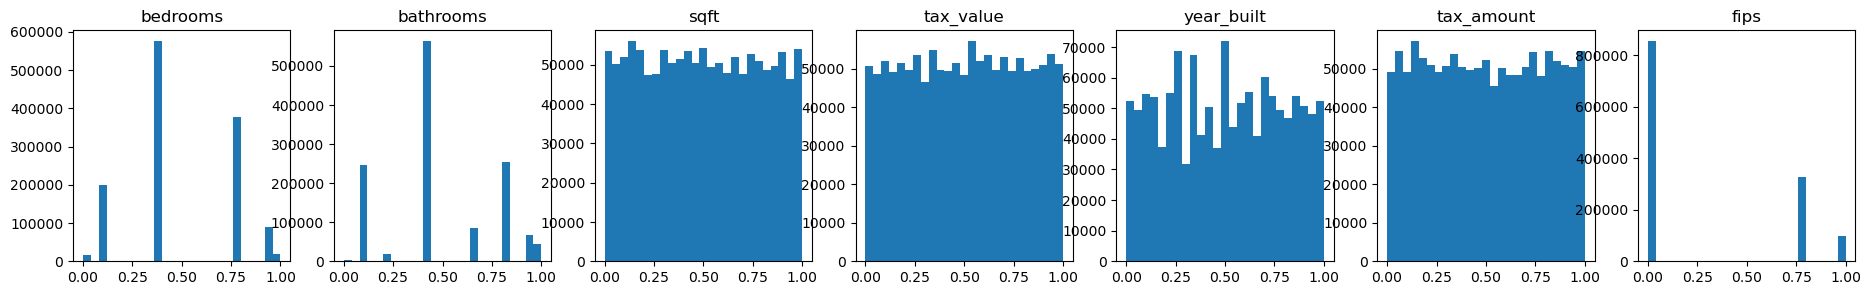

In [55]:
plt.figure(figsize=(23, 3))

for i, col in enumerate(train_scaled.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,7, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    train_scaled[col].hist(bins=25)

    # Hide gridlines.
    plt.grid(False)

I notice that instead of looking like a normal distribution it looks more uniform wherever possible

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [59]:
def scale_zillow():
    # Split the Data
    train_validate, test = train_test_split(zillow, test_size = .2, random_state=823)
    train, validate = train_test_split(train_validate, test_size= .25, random_state=823)
    
    #Set the Scaler
    scaler = sklearn.preprocessing.MinMaxScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(train)

    # Turn all the sets inot the scaled np data array
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    
    # Create a dictionary so that I can take the np arrays back to a labelled pd DataFrame
    columns = train.columns #List of Columns
    numbers = [0,1,2,3,4,5,6] #List of numbers for the scaled np array I'm converting into a dataframe
    zipped= dict(zip(numbers, columns))

    
    #turn the Train Validate and Test arrays back into labelled DataFrames
    train_scaled = pd.DataFrame(train_scaled).rename(columns=zipped)
    validate_scaled = pd.DataFrame(validate_scaled).rename(columns=zipped)
    test_scaled = pd.DataFrame(test_scaled).rename(columns=zipped)
    
    #Return the three scaled DataFrames
    return train_scaled, validate_scaled, test_scaled

In [61]:
train_scaled, validate_scaled, test_scaled = scale_zillow()

In [62]:
train_scaled

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,0.12,0.062500,0.001595,0.004776,0.558140,0.004913,0.000000
1,0.20,0.093750,0.003080,0.004443,0.711628,0.003225,0.000000
2,0.16,0.125000,0.003562,0.013627,0.730233,0.012593,0.297297
3,0.08,0.062500,0.001099,0.002127,0.576744,0.003192,0.000000
4,0.16,0.093750,0.002983,0.002200,0.948837,0.003169,0.000000
...,...,...,...,...,...,...,...
1278123,0.12,0.093750,0.002269,0.002620,0.730233,0.002777,0.000000
1278124,0.20,0.093750,0.003205,0.003686,0.906977,0.004416,0.000000
1278125,0.16,0.078125,0.002821,0.011130,0.925581,0.010374,0.297297
1278126,0.20,0.093750,0.004570,0.007539,0.911628,0.006926,1.000000
